In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,7)

In [2]:
df = pd.read_csv('Fraud.csv')

## Exploratory Data Analysis 

In [3]:
df.shape

(6362620, 11)

In [4]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [11]:
fraud_count = df.isFraud.value_counts()[0]
legal_count = df.isFraud.value_counts()[1]

In [12]:
print('Percentage of fraud transactions: ',(fraud_count/(fraud_count+legal_count))*100)
print('Percentage of legal transactions: ',(legal_count/(fraud_count+legal_count))*100)

Percentage of fraud transactions:  99.87091795518198
Percentage of legal transactions:  0.12908204481801522


**Note:** Our original dataset is highly unbalanced! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

In [13]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [14]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

### Reducing the size of dataframe to 10% as it might take a lot of time on my PC to process. 
- **Note:**
    - df1 has been used only for **visualization purposes.**

In [15]:
df1=df.sample(n=int(df.shape[0]*0.1), random_state=0)

In [16]:
df1.shape

(636262, 11)

### Data Visualization

<AxesSubplot:xlabel='type', ylabel='count'>

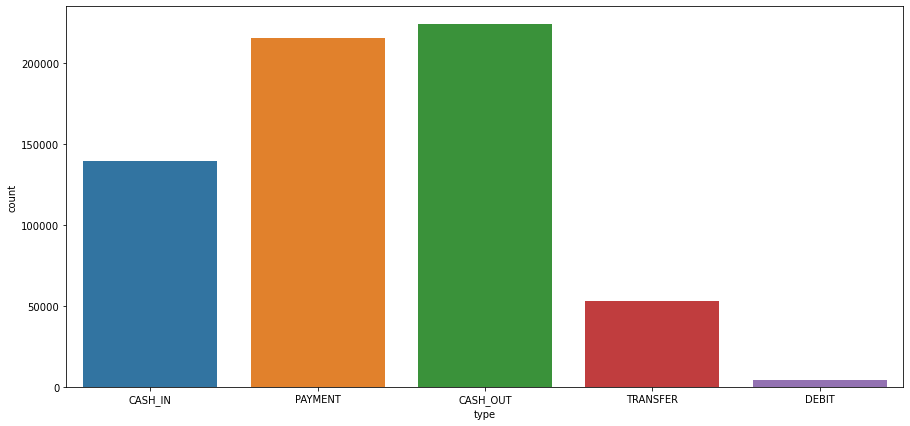

In [17]:
sns.countplot(x=df1['type'])

In [18]:
#Merchants and its relation with Fraud transactions
df_merchant = df1[df1['nameDest'].str.contains('M')]
df_merchant

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3800666,281,PAYMENT,3473.75,C1283140808,0.00,0.00,M2044695613,0.0,0.0,0,0
3500205,259,PAYMENT,12401.59,C1932491210,115022.00,102620.41,M1912182734,0.0,0.0,0,0
4546763,326,PAYMENT,0.24,C1560061062,2860.00,2859.76,M80636379,0.0,0.0,0,0
5496085,380,PAYMENT,61681.67,C373132241,231357.94,169676.27,M638432919,0.0,0.0,0,0
1806606,163,PAYMENT,15540.69,C1669763682,0.00,0.00,M1512738381,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2637639,209,PAYMENT,7129.62,C515557064,0.00,0.00,M919661301,0.0,0.0,0,0
4733204,332,PAYMENT,24603.85,C1121684557,258592.00,233988.15,M277576142,0.0,0.0,0,0
4929174,350,PAYMENT,8423.82,C473819740,0.00,0.00,M685452347,0.0,0.0,0,0
4375316,311,PAYMENT,8809.35,C1474856853,73614.00,64804.65,M1665903236,0.0,0.0,0,0


In [19]:
df_merchant.isFraud.value_counts()

0    215659
Name: isFraud, dtype: int64

### Conclusion:
- None of the transactions from merchant is fraud.
- Hence we can drop all transactions from merchants, while training our model.

In [20]:
df1[df1['nameOrig'].str.contains('C')].shape

(636262, 11)

- NO problem with Customers part.

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

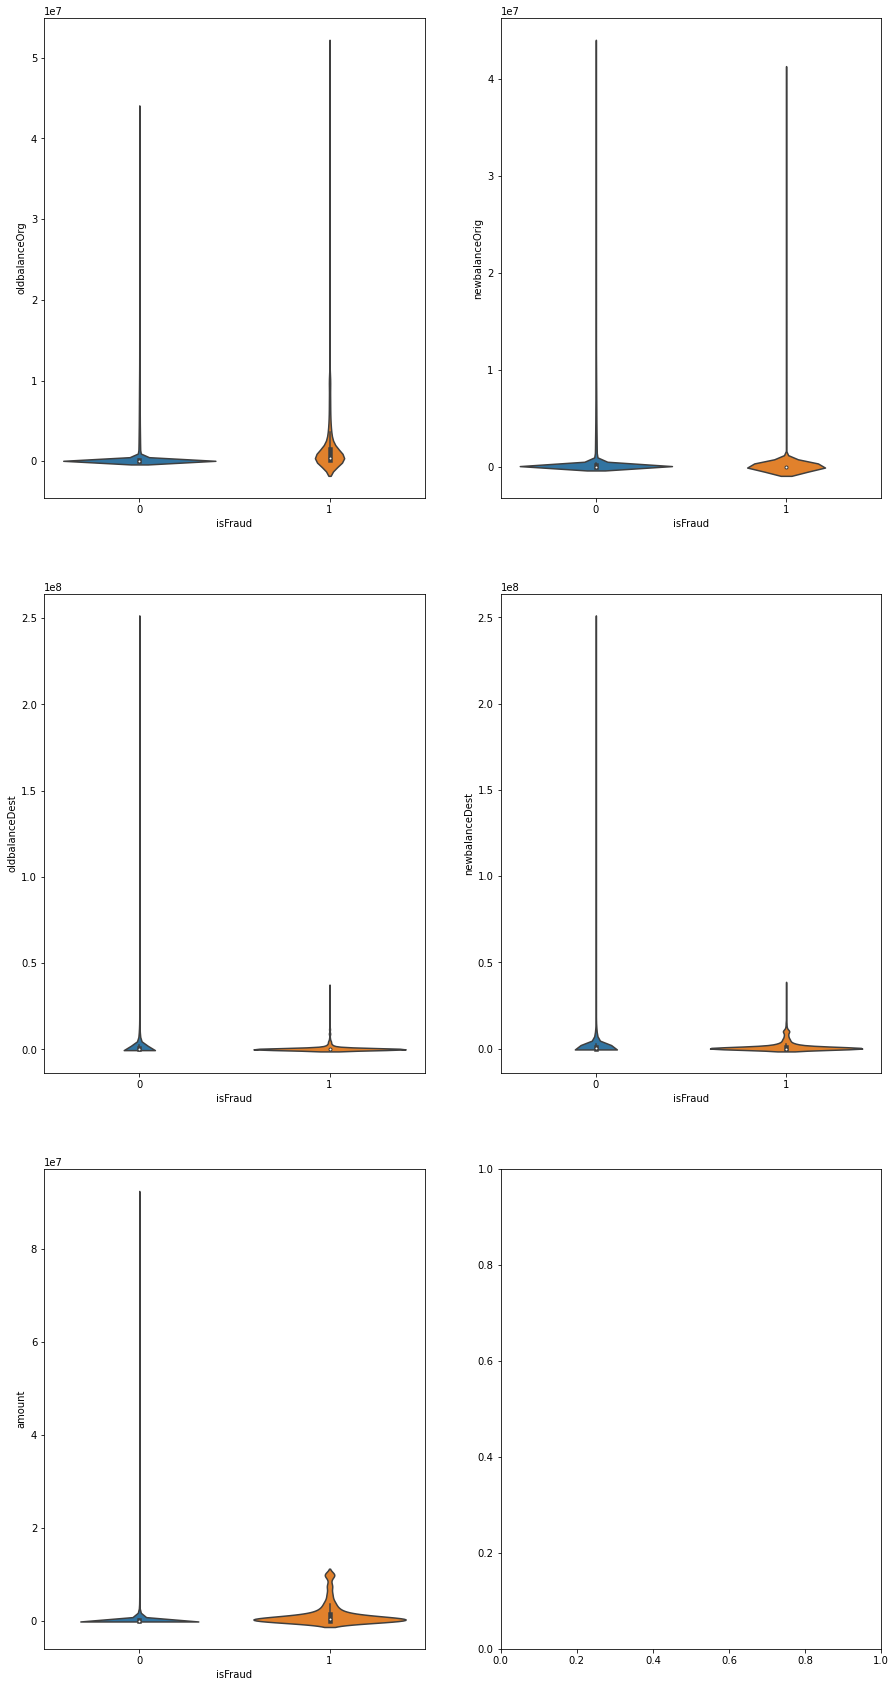

In [21]:
fig,ax=plt.subplots(3,2,figsize=(15,30))
sns.violinplot(x=df1.isFraud,y=df1['oldbalanceOrg'],ax=ax[0][0])
sns.violinplot(x=df1.isFraud,y=df1['newbalanceOrig'],ax=ax[0][1])
sns.violinplot(x=df1.isFraud,y=df1['oldbalanceDest'],ax=ax[1][0])
sns.violinplot(x=df1.isFraud,y=df1['newbalanceDest'],ax=ax[1][1])

sns.violinplot(x=df1.isFraud,y=df1['amount'],ax=ax[2][0])

#### Conclusions from above plots:-
* In almost all of the fraud transaction cases newbalanceOrg is **0.**
- Accounts with very very high oldbalanceOrg have very low chances of havig fraud transactions.(expected)


#### Correlation matrix -> Multicolinearity

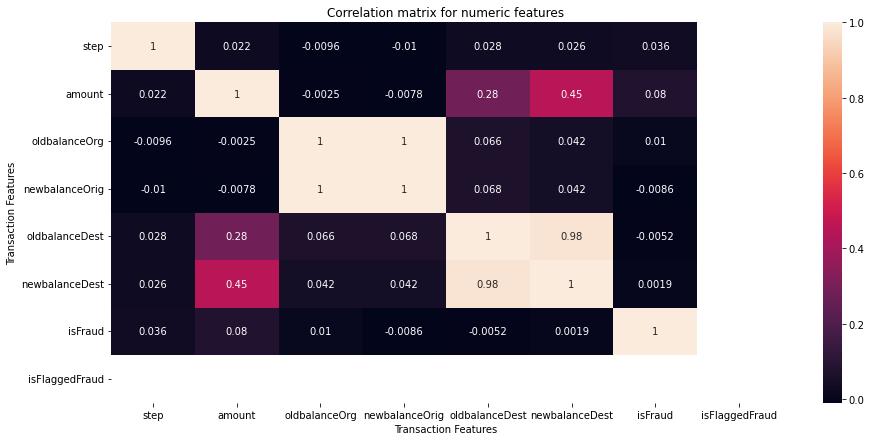

In [22]:
corr_matrix= df1.corr() # by default it uses pearson's correlation
# corr_matrix
sns.heatmap(corr_matrix,annot=True)
plt.xlabel('Transaction Features')
plt.ylabel('Transaction Features')
plt.title('Correlation matrix for numeric features')
plt.show()

-  **Some Obvious Conclusions from Correlation matrix **
- newbalanceDest is highly correlated with oldbalanceDest which is obvious.
- newbalanceDest and oldbalanceDest is correlated with the amount of transaction which is obvious.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


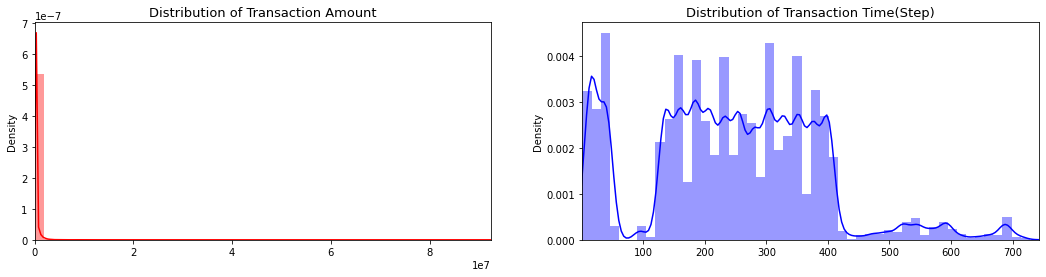

In [23]:
# sns.displot(data = df1,x='amount',kind='kde')
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df1['amount'].values
time_val = df1['step'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=13)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time(Step)', fontsize=13)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

- Most of the transactions are for value less than 200,000.

In [24]:
#Droping transactions from merchants(as all transactions from merchants are non-fraud)
df_new = df[~df.nameDest.str.contains('M')].copy()

In [25]:
df_new.isFraud.value_counts()

0    4202912
1       8213
Name: isFraud, dtype: int64

#### Scaling
- Here, we first need to do scaling of amount and time(step).
- Also,we need to create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.
- In this scenario we need to create a sub sample which contains fraud and non-fraud case in 50:50 ratio(i.e.- our model will have fraud and non-fraud cases in approximately same number)
- There is very high risk that our model overfits the dataset.
    - **Overfitting:** Our classification model will assume the all transactions to be non-fraud(legal).But, we don't want that to happen. We ant to be sure of it whenever it occurs.

***
**Summary:-**
- Important    
    - We will have **scaled_time** and **scaled_amount** as new columns replacing step and amount respectively.
    - There are 8213 cases of fraud in our dataset so we can randomly choose the same number of cases for non-fraud transactions.
    - We wil concat the fraud cases and non fraud cases as discussed above.

In [26]:
from sklearn.preprocessing import StandardScaler,RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df_new['scaled_amount'] = rob_scaler.fit_transform(df_new['amount'].values.reshape(-1,1))
df_new['scaled_time'] = rob_scaler.fit_transform(df_new['step'].values.reshape(-1,1))

df_new.drop(['step','amount'], axis=1, inplace=True)

In [27]:
df_new.head()

,type,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,scaled_amount,scaled_time
2,TRANSFER,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,0,-0.784400,-1.318436
3,CASH_OUT,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,0,-0.784400,-1.318436
9,DEBIT,C712410124,41720.0,36382.23,C195600860,41898.0,40348.79,0,0,-0.758922,-1.318436
10,DEBIT,C1900366749,4465.0,0.00,C997608398,10845.0,157982.12,0,0,-0.737642,-1.318436
15,CASH_OUT,C905080434,15325.0,0.00,C476402209,5083.0,51513.44,0,0,0.346793,-1.318436


- Points to focus:-
    - We need to use label encoding for type column.
    - We also need to scale the balance related columns.
    - Then we will drop nameOrig,nameDest,isFlaggedFraud. Here we are droping nameOrig and nameDest as their entropy is nearly equal to 1 and they are not going to effect whether a transaction is fraud or not.
    - Then our data will be ready for model training and testiong.

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new['labelled_type'] = le.fit_transform(df_new['type'].astype(str))

In [29]:
df_new.drop(['type','nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [30]:
# we will use standard scaling for balance columns
df_new['norm_oldbalanceOrig'] = std_scaler.fit_transform(df_new['oldbalanceOrg'].values.reshape(-1,1))
df_new['norm_newbalanceOrig'] = std_scaler.fit_transform(df_new['newbalanceOrig'].values.reshape(-1,1))
df_new['norm_oldbalanceDest'] = std_scaler.fit_transform(df_new['oldbalanceDest'].values.reshape(-1,1))
df_new['norm_newbalanceDest'] = std_scaler.fit_transform(df_new['newbalanceDest'].values.reshape(-1,1))

#droping these columns
df_new.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'], inplace= True, axis= 1)


In [31]:
df_new.head()

,isFraud,scaled_amount,scaled_time,labelled_type,norm_oldbalanceOrig,norm_newbalanceOrig,norm_oldbalanceDest,norm_newbalanceDest
2,1,-0.784400,-1.318436,3,-0.351678,-0.357747,-0.409139,-0.421984
3,1,-0.784400,-1.318436,1,-0.351678,-0.357747,-0.403928,-0.421984
9,0,-0.758922,-1.318436,2,-0.339752,-0.347420,-0.398831,-0.412785
10,0,-0.737642,-1.318436,2,-0.350448,-0.357747,-0.406471,-0.385965
15,0,0.346793,-1.318436,1,-0.347330,-0.357747,-0.407888,-0.410239


### Splitting the data 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df_new.drop('isFraud',axis=1)
y = df_new['isFraud']


#### Random Under Sampling
- We will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.
##### Steps:-
    - We should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 8213 cases of fraud and 8213 cases of non-fraud transactions.
    - After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.
    
**Note:**
    - The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of **information loss.**

In [33]:
# Lets shuffle the data before creating the subsamples

df_new = df_new.sample(frac=1)

# amount of fraud classes 8213 rows.
fraud_df = df_new.loc[df_new['isFraud'] == 1]
non_fraud_df = df_new.loc[df_new['isFraud'] == 0][:8213]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
req_df = normal_distributed_df.sample(frac=1, random_state=42)

req_df.head()

,isFraud,scaled_amount,scaled_time,labelled_type,norm_oldbalanceOrig,norm_newbalanceOrig,norm_oldbalanceDest,norm_newbalanceDest
4931810,0,1.933924,0.631285,3,-0.343973,-0.357747,-0.409139,-0.296503
4125783,0,-0.318272,0.363128,1,-0.336991,-0.357747,-0.401784,-0.393617
6019708,1,-0.391434,1.223464,3,-0.328842,-0.357747,-0.409139,-0.421984
4775,1,-0.360046,-1.301676,3,-0.327018,-0.357747,-0.409139,-0.421984
792109,1,-0.652142,-1.100559,3,-0.343992,-0.357747,-0.409139,-0.421984


Distribution of fraud and non-fraud in sample dataset:
0    0.5
1    0.5
Name: isFraud, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


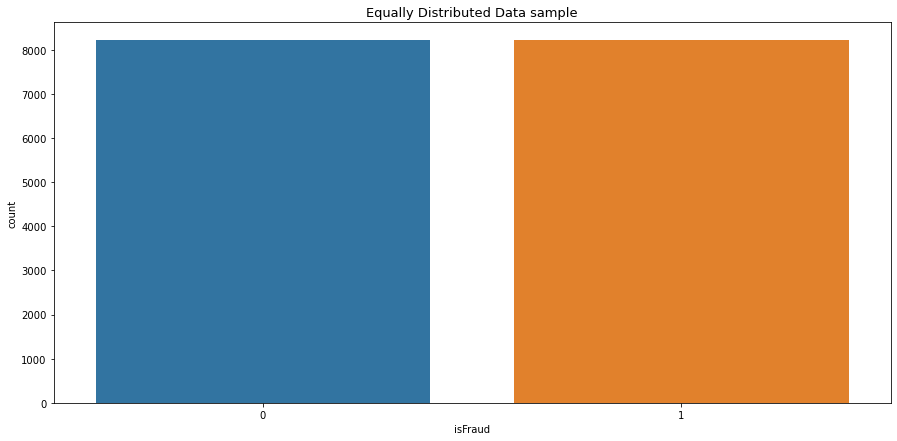

In [34]:
print('Distribution of fraud and non-fraud in sample dataset:')
print(req_df['isFraud'].value_counts()/len(req_df))

sns.countplot('isFraud', data=req_df)
plt.title('Equally Distributed Data sample', fontsize=13)
plt.show()

In [35]:
X = req_df.drop('isFraud',axis=1)
y = req_df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

### Model Training 

In [37]:
#importing Classifier Libraries - Since our problem is a classification problem
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [42]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 5) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 89.726 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 89.749 % accuracy score
Classifiers:  SVC Has a training score of 84.764 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 98.607 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 98.836 % accuracy score


- Hence we consider Decision Tree and Random Forest for further purposes.

In [39]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, y_test) * 100

# RANDOM FOREST

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, y_test) * 100



# Confusion Matrix - DT

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("**********************************************************************")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[1605   17]
 [  23 1641]]
**********************************************************************
Confusion Matrix - Random Forest
[[1600   22]
 [   8 1656]]


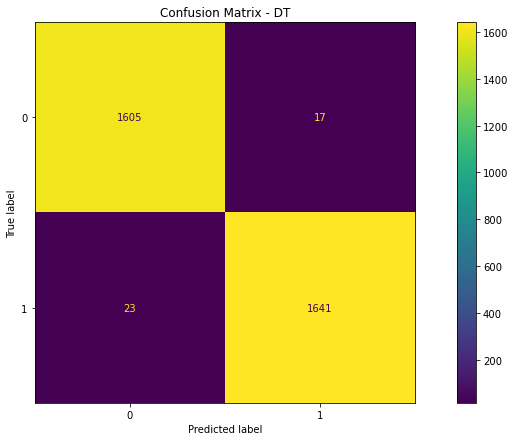

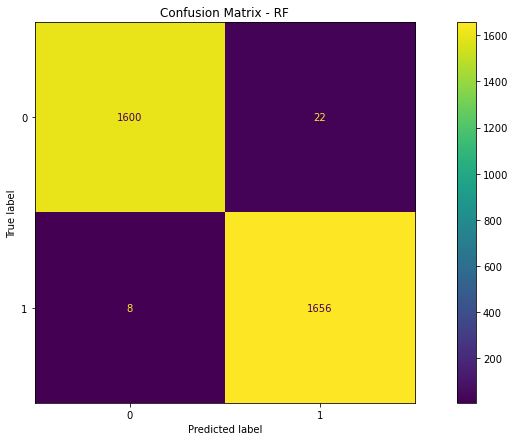

In [40]:
#visualizing the above matrix
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
display.plot()
plt.title('Confusion Matrix - DT')
plt.show()


display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
display.plot()
plt.title('Confusion Matrix - RF')
plt.show()

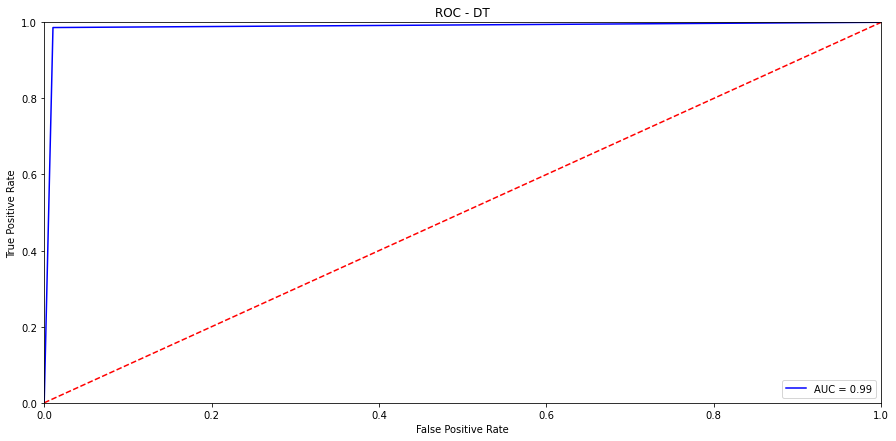

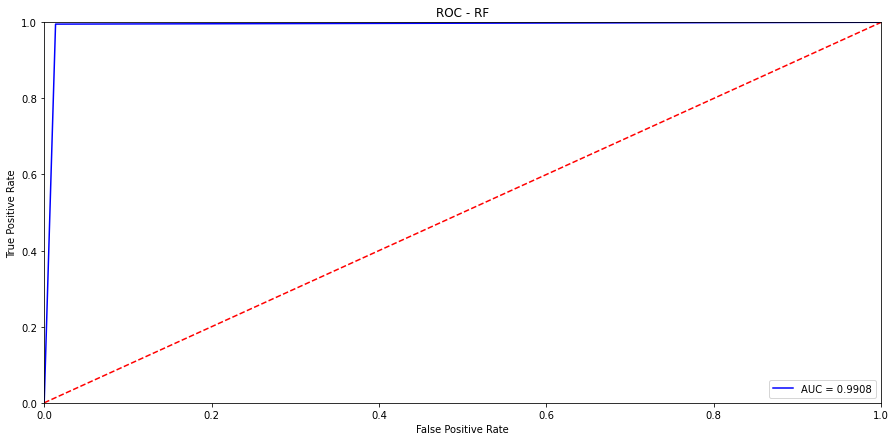

In [43]:
from sklearn import metrics

#AUC
# ROC for DT

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ROC for RF

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- AUC for RandomForest is slightly higher as compared to Decision Tree, but we can consider any one of the two to do our job.

# SUMMARY:


- Here in this case we have a highly imbalanced dataset(99.87% -> fraud & 0.13% -> non-fraud). So, we first need to deal with it, therefore we have used Random Under Sampling to get (50/50) ratio of fraud and non-fraud transactions.
- We are supposed to classify a transaction as fraud or non-fraud. Hence I tried to use the best classification algorithm by checking which one is more accurate.
- It is also needed to get a good precision and recall value on our dataset.It was also one of the factor while choosing the ML model.
- **Key Questions:**
    - What are the key factors that predict fraudulent customer?
        - Transaction history of destination.
        - In most of the cases final balance at origin is zero.
        - Legitimity of source of transaction request.
   
    - What kind of prevention should be adopted while company update its infrastructure?
        - Use vertified apps and transaction route/source only.
        - By using double layer of security in terms of forwarding a transaction or may be by using biotech such as retina data or fingerprint data for validating a transaction.
        - We can also use an encrypted way of transaction.
        - By keeping our data secured and security updated.
        - Don't respond to unknown sources of calls/SMS/E-mails.
        - If you feel like you have been tricked or security compromised, contact your bank immidiately.
        
    - Assuming these actions have been implemented, how would you determine if they work?
        - By looking at Bank E-statements of transactions.
        - Keeping a log of your payments.-> For both company as well as customers.
